In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from scipy.integrate import solve_ivp

In [3]:
# parameter setting
alpha_0 = 4.7e-5#0.000047     # baseline of adv conversion rate
A = 0.00005          # periodic fluctuation
phi = 19*np.pi/14           # fluctuation phase
beta_0 = 2.14e-6 #1.7e-6    # baseline of churn rate
#m = 0#0.000035/365

# ODE system
def ode_system(t, y):
    P, C, L = y
    alpha_t = alpha_0 + A * np.sin(2 * np.pi * t / 7 - phi)
    alpha_t = max(alpha_t, 0)  # should be non-negative
    beta_t = beta_0
    dPdt = -alpha_t * P
    dCdt = alpha_t * P - beta_t * C
    dLdt = beta_t * C
    return [dPdt, dCdt, dLdt]

# initial conditions (data in 2025)
N = 752000000#729964000
C0 = 22000000#36000000
L0 = 36000#58000
P0 = N - C0 - L0
y0 = [P0, C0, L0]

# time setting
t_span = (0, 365)  # time interval 365
t_eval = np.arange(0,366)

In [4]:
# Solve ODE
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)
t_vals, P_vals, C_vals, L_vals = sol.t, sol.y[0], sol.y[1], sol.y[2]

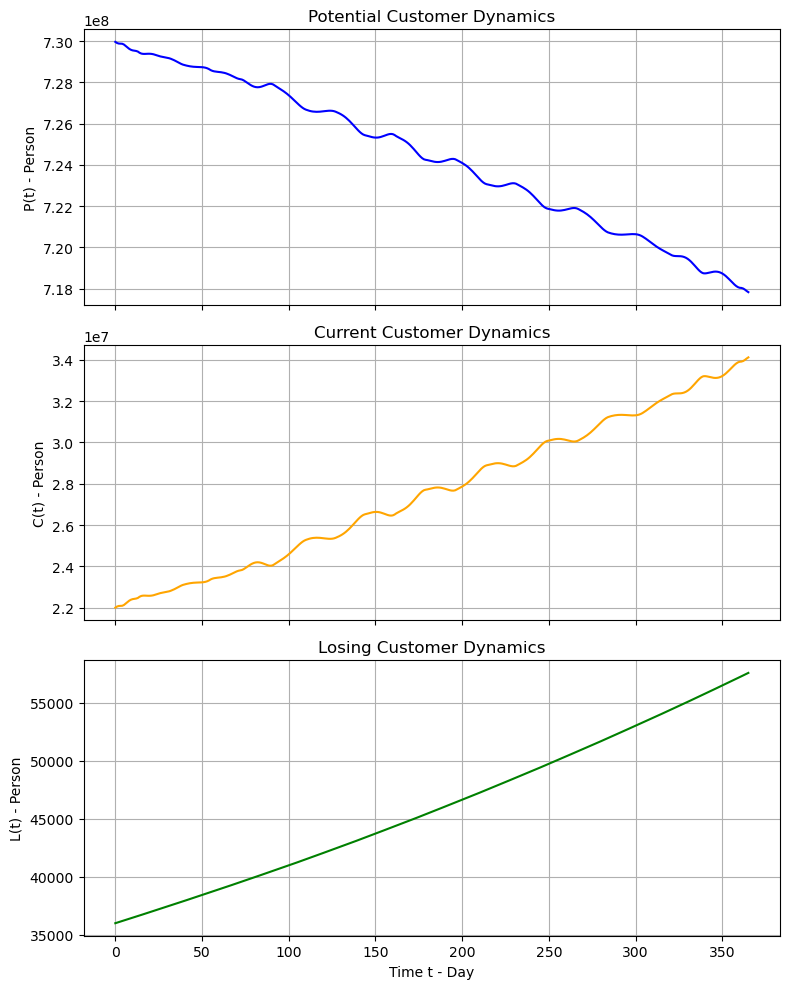

P(365) = 717,828,153
C(365) = 34,114,280
L(365) = 57,567


In [5]:
# Visualization
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

axes[0].plot(t_vals, P_vals, color='blue')
axes[0].set_ylabel('P(t) - Person')
axes[0].set_title('Potential Customer Dynamics')

axes[1].plot(t_vals, C_vals, color='orange')
axes[1].set_ylabel('C(t) - Person')
axes[1].set_title('Current Customer Dynamics')

axes[2].plot(t_vals, L_vals, color='green')
axes[2].set_ylabel('L(t) - Person')
axes[2].set_title('Losing Customer Dynamics')
axes[2].set_xlabel('Time t - Day')

for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()
print(f"P(365) = {sol.y[0][-1]:,.0f}")
print(f"C(365) = {sol.y[1][-1]:,.0f}")
print(f"L(365) = {sol.y[2][-1]:,.0f}")

In [6]:
#churn_rates = [0.00000214, 0.00000170, 0.00000143]
churn_rates = [2.14e-6, 1.7e-6, 1.43e-6]
years = [1, 2, 3]  # representing the 1st, 2nd, and 3rd year

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(years).reshape(-1, 1)
y = np.array(churn_rates)

model = LinearRegression()
model.fit(X, y)

# predict daily churn rate in future three years
future_years = np.array([4, 5, 6]).reshape(-1, 1)
predicted_churn = model.predict(future_years)
print(predicted_churn)


[1.04666667e-06 6.91666667e-07 3.36666667e-07]
